In [16]:
# U.S. BUREAU OF LABOR STATISTICS
# Series IDs: https://www.bls.gov/help/hlpforma.htm#ML

import requests
import json
import prettytable

# Define API request data
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0', 'SUUR0000SA0'], "startyear": "2011", "endyear": "2014"})

# Make an API request
response = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(response.text)

for series in json_data['Results']['series']:
    # Create a PrettyTable for each series
    x = prettytable.PrettyTable(["Series ID", "Year", "Period", "Value", "Footnotes"])
    series_id = series['seriesID']
    
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        
        # Extract and format footnotes
        footnotes = ""
        for footnote in item['footnotes']:
            if footnote:
                footnotes += footnote['text'] + ','
        
        if 'M01' <= period <= 'M12':
            x.add_row([series_id, year, period, value, footnotes.rstrip(',')])
    
    # Print the PrettyTable for each series
    print(f"Table for Series ID: {series_id}")
    print(x)
    print("\n")


Table for Series ID: CUUR0000SA0
+-------------+------+--------+---------+-----------+
|  Series ID  | Year | Period |  Value  | Footnotes |
+-------------+------+--------+---------+-----------+
| CUUR0000SA0 | 2014 |  M12   | 234.812 |           |
| CUUR0000SA0 | 2014 |  M11   | 236.151 |           |
| CUUR0000SA0 | 2014 |  M10   | 237.433 |           |
| CUUR0000SA0 | 2014 |  M09   | 238.031 |           |
| CUUR0000SA0 | 2014 |  M08   | 237.852 |           |
| CUUR0000SA0 | 2014 |  M07   | 238.250 |           |
| CUUR0000SA0 | 2014 |  M06   | 238.343 |           |
| CUUR0000SA0 | 2014 |  M05   | 237.900 |           |
| CUUR0000SA0 | 2014 |  M04   | 237.072 |           |
| CUUR0000SA0 | 2014 |  M03   | 236.293 |           |
| CUUR0000SA0 | 2014 |  M02   | 234.781 |           |
| CUUR0000SA0 | 2014 |  M01   | 233.916 |           |
| CUUR0000SA0 | 2013 |  M12   | 233.049 |           |
| CUUR0000SA0 | 2013 |  M11   | 233.069 |           |
| CUUR0000SA0 | 2013 |  M10   | 233.546 |        

In [4]:
import requests
import json
import prettytable

# Define API request data
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['MLUMS00NN0001003'], "startyear": "2011", "endyear": "2014"})

# Make an API request
response = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(response.text)

for series in json_data['Results']['series']:
    # Create a PrettyTable for each series
    x = prettytable.PrettyTable(["Series ID", "Year", "Period", "Value", "Footnotes"])
    series_id = series['seriesID']
    
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        
        # Extract and format footnotes
        footnotes = ""
        for footnote in item['footnotes']:
            if footnote:
                footnotes += footnote['text'] + ','
        
        if 'M01' <= period <= 'M12':
            x.add_row([series_id, year, period, value, footnotes.rstrip(',')])
    
    # Print the PrettyTable for each series
    print(f"Table for Series ID: {series_id}")
    print(x)
    print("\n")

Table for Series ID: MLUMS00NN0001003
+------------------+------+--------+-------+-----------+
|    Series ID     | Year | Period | Value | Footnotes |
+------------------+------+--------+-------+-----------+
| MLUMS00NN0001003 | 2013 |  M05   |  1383 |           |
| MLUMS00NN0001003 | 2013 |  M04   |  1174 |           |
| MLUMS00NN0001003 | 2013 |  M03   |  1132 |           |
| MLUMS00NN0001003 | 2013 |  M02   |  960  |           |
| MLUMS00NN0001003 | 2013 |  M01   |  1528 |           |
| MLUMS00NN0001003 | 2012 |  M12   |  1973 |           |
| MLUMS00NN0001003 | 2012 |  M11   |  2339 |           |
| MLUMS00NN0001003 | 2012 |  M10   |  1142 |           |
| MLUMS00NN0001003 | 2012 |  M09   |  811  |           |
| MLUMS00NN0001003 | 2012 |  M08   |  1063 |           |
| MLUMS00NN0001003 | 2012 |  M07   |  1515 |           |
| MLUMS00NN0001003 | 2012 |  M06   |  1890 |           |
| MLUMS00NN0001003 | 2012 |  M05   |  1201 |           |
| MLUMS00NN0001003 | 2012 |  M04   |  1421 |      

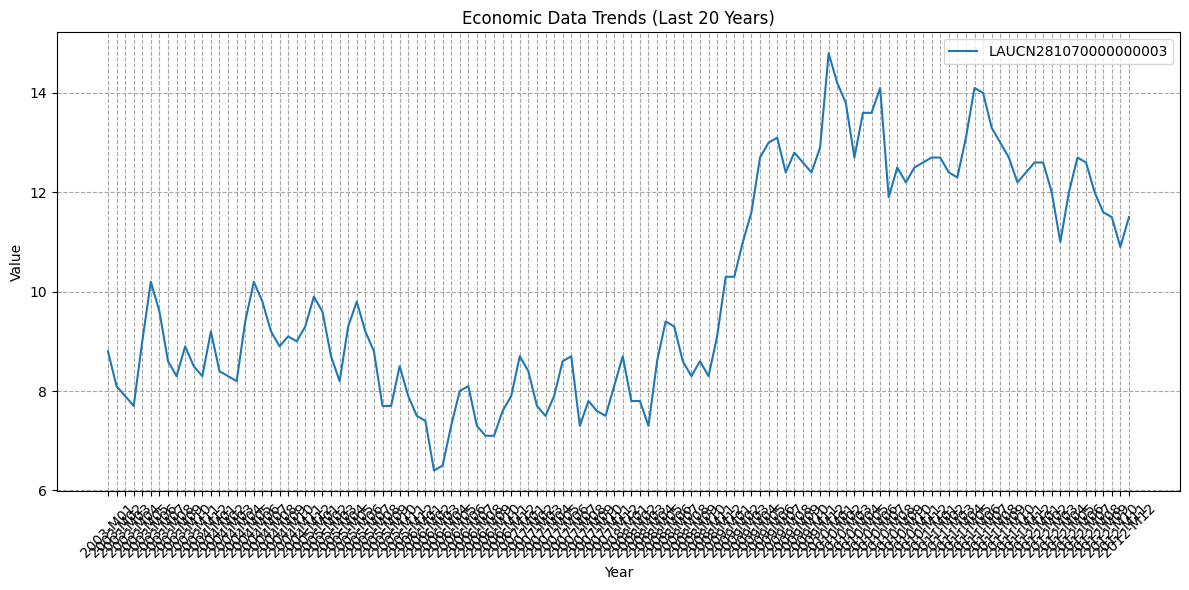

In [15]:
import requests
import json
import prettytable
import matplotlib.pyplot as plt
import pandas as pd

# Define API request data
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LAUCN281070000000003'], "startyear": "2003", "endyear": "2024"})

# Make an API request
response = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(response.text)

# Prepare data for plotting
data_dict = {}
for series in json_data['Results']['series']:
    series_id = series['seriesID']
    for item in series['data']:
        year = int(item['year'])
        period = item['period']
        value = float(item['value'])
        date = f"{year}-{period}"
        if date not in data_dict:
            data_dict[date] = {}
        data_dict[date][series_id] = value

# Create a DataFrame from the data
df = pd.DataFrame.from_dict(data_dict, orient='index')

# Plot the data
plt.figure(figsize=(12, 6))
for series_id in df.columns:
    plt.plot(df.index, df[series_id], label=series_id)

plt.title('Economic Data Trends (Last 20 Years)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

